In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import numpy as np
import matplotlib.dates as mdates

In [214]:
cab_data = pd.read_csv("Cab_Data.csv")
cab_data.shape

(359392, 7)

In [215]:
city = pd.read_csv("city.csv")
city.shape

(20, 3)

In [216]:
customer_id = pd.read_csv("Customer_Id.csv")
customer_id.shape

(49171, 4)

In [217]:
transaction_id = pd.read_csv("Transaction_Id.csv")
transaction_id.shape

(440098, 3)

In [218]:
master = pd.DataFrame(cab_data)
master = pd.merge(master, transaction_id, on=['Transaction ID'])
master = pd.merge(master, city, on=['City'])
master = pd.merge(master, customer_id, on=['Customer ID'])
master.shape

(359392, 14)

In [219]:
master.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month)
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,"814,885","24,701",Male,28,10813
1,10351127,21-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,"814,885","24,701",Male,28,10813
2,10412921,23-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,"814,885","24,701",Male,28,10813
3,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,"814,885","24,701",Male,27,9237
4,10320494,21-04-2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,"814,885","24,701",Male,27,9237


In [220]:
master.to_csv('master.csv')

# City Analysis

In [44]:
city = pd.read_csv("city.csv")
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [4]:
city.shape

(20, 3)

In [5]:
city.describe

<bound method NDFrame.describe of                 City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021 >

In [6]:
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8')

population = []
for p in city['Population']:
    population.append(locale.atoi(p))
    
users = []
for u in city['Users']:
    users.append(locale.atoi(u))

non_users = np.subtract(population,users)

In [19]:
city_users = pd.DataFrame(city)
city_users['Population'] = population
city_users['Users'] = users
city_users['Non_Users'] = non_users
city_users

,City,Population,Users,Non_Users
0,NEW YORK NY,8405837,302149,8103688
1,CHICAGO IL,1955130,164468,1790662
2,LOS ANGELES CA,1595037,144132,1450905
3,MIAMI FL,1339155,17675,1321480
4,SILICON VALLEY,1177609,27247,1150362
5,ORANGE COUNTY,1030185,12994,1017191
6,SAN DIEGO CA,959307,69995,889312
7,PHOENIX AZ,943999,6133,937866
8,DALLAS TX,942908,22157,920751
9,ATLANTA GA,814885,24701,790184


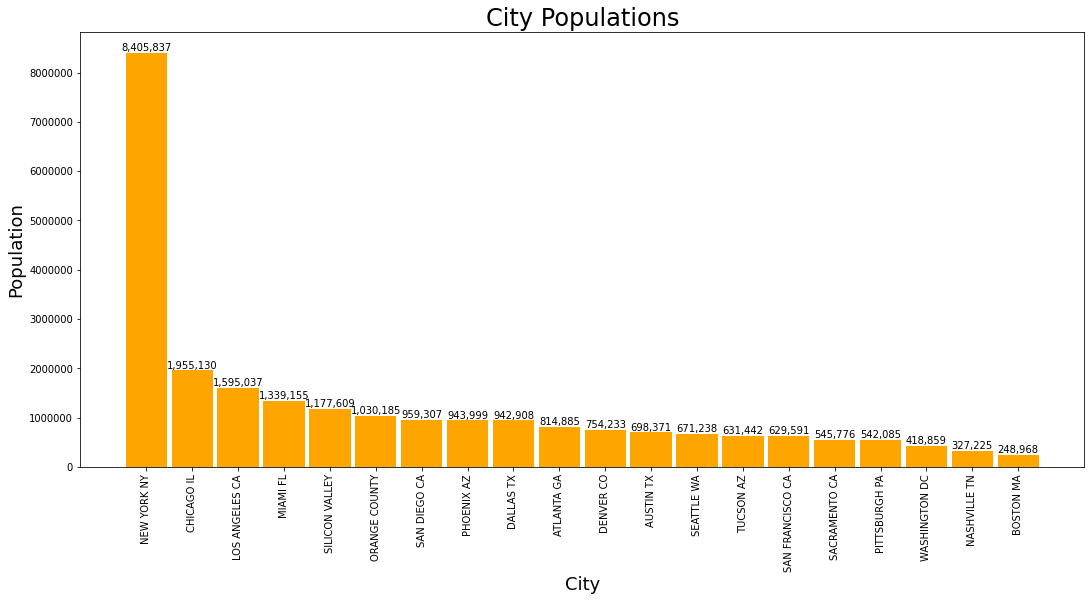

In [21]:
fig, ax = plt.subplots(figsize=(18, 8))
plt.ticklabel_format(style='plain') 
plt.bar(city_users['City'], city_users['Population'], .9, color="orange")

container = ax.containers[0]
ax.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])
plt.xticks(rotation = 90)

plt.title('City Populations',  fontsize = 24)
plt.xlabel('City', fontsize = 18)
plt.ylabel('Population', fontsize = 18)

plt.show()

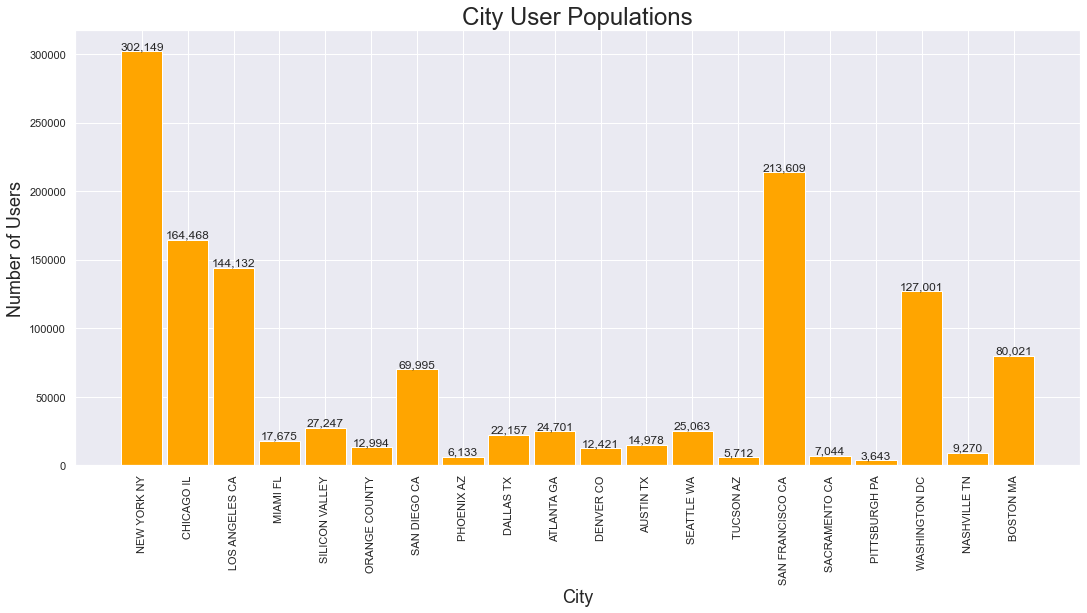

In [242]:
fig, ax = plt.subplots(figsize=(18, 8))
plt.ticklabel_format(style='plain') 
plt.bar(city_users['City'], city_users['Users'], .9, color="orange")

container = ax.containers[0]
ax.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])
plt.xticks(rotation = 90)

plt.title('City User Populations',  fontsize = 24)
plt.xlabel('City', fontsize = 18)
plt.ylabel('Number of Users', fontsize = 18)

plt.show()

In [223]:
city_perc = pd.DataFrame(city_users)
city_perc.drop(['Population'], axis=1, inplace=True)
list(city_perc.columns)

['City', 'Users', 'Non_Users']

# Company Comparisons

In [46]:
city_count = pd.DataFrame(cab_data)
city_count = pd.merge(city_count, city, on=['City'])

In [47]:
city_count.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [49]:
#table = pd.pivot_table(data = city_count, index=['Company'], columns=['City'], aggfunc=np.sum)

In [84]:
company_count = cab_data.groupby(['Company'])['Company'].count()
company_count

Company
Pink Cab       84711
Yellow Cab    274681
Name: Company, dtype: int64

Text(0, 0.5, 'Count')

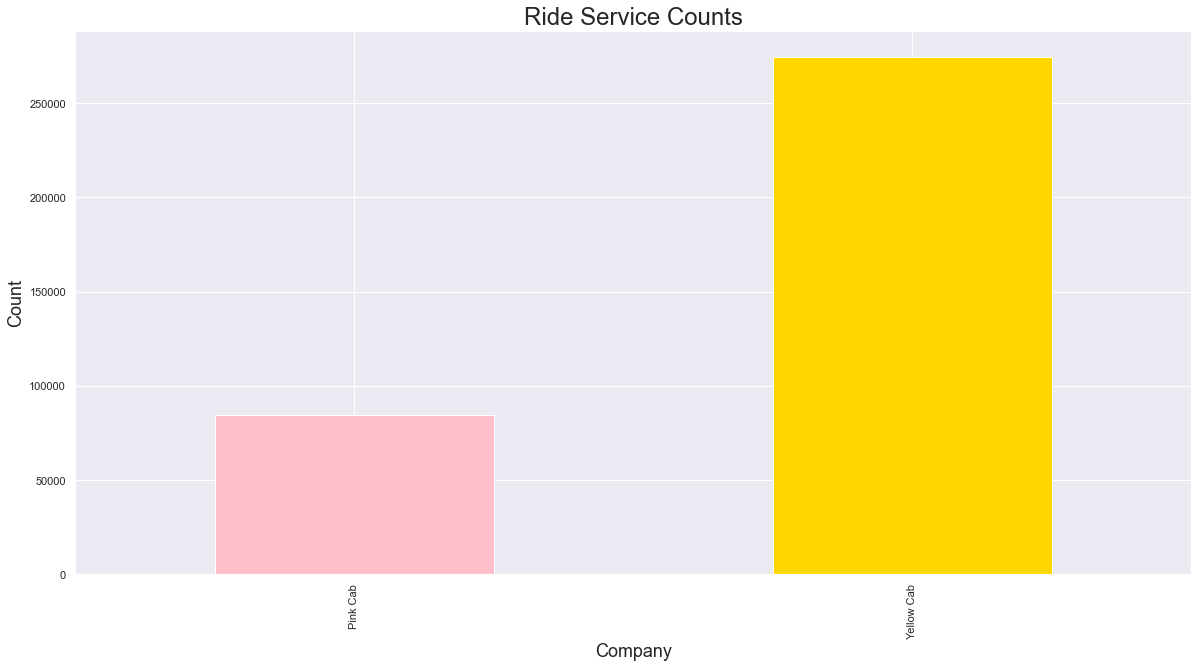

In [100]:
plt.rcParams["figure.figsize"] = (20, 10)
company_count.plot.bar(color=['pink', 'gold'])
plt.title('Ride Service Counts',  fontsize = 24)
plt.xlabel('Company', fontsize = 18)
plt.ylabel('Count', fontsize = 18)

It seems that Yellow Cab has given out more services.

## City Comparisons

In [102]:
city_C = city_count.groupby(['City', 'Company'])['City'].count()
city_C

City            Company   
ATLANTA GA      Pink Cab       1762
                Yellow Cab     5795
AUSTIN TX       Pink Cab       1868
                Yellow Cab     3028
BOSTON MA       Pink Cab       5186
                Yellow Cab    24506
CHICAGO IL      Pink Cab       9361
                Yellow Cab    47264
DALLAS TX       Pink Cab       1380
                Yellow Cab     5637
DENVER CO       Pink Cab       1394
                Yellow Cab     2431
LOS ANGELES CA  Pink Cab      19865
                Yellow Cab    28168
MIAMI FL        Pink Cab       2002
                Yellow Cab     4452
NASHVILLE TN    Pink Cab       1841
                Yellow Cab     1169
NEW YORK NY     Pink Cab      13967
                Yellow Cab    85918
ORANGE COUNTY   Pink Cab       1513
                Yellow Cab     2469
PHOENIX AZ      Pink Cab        864
                Yellow Cab     1200
PITTSBURGH PA   Pink Cab        682
                Yellow Cab      631
SACRAMENTO CA   Pink Cab       1334
 

Text(0, 0.5, 'Count')

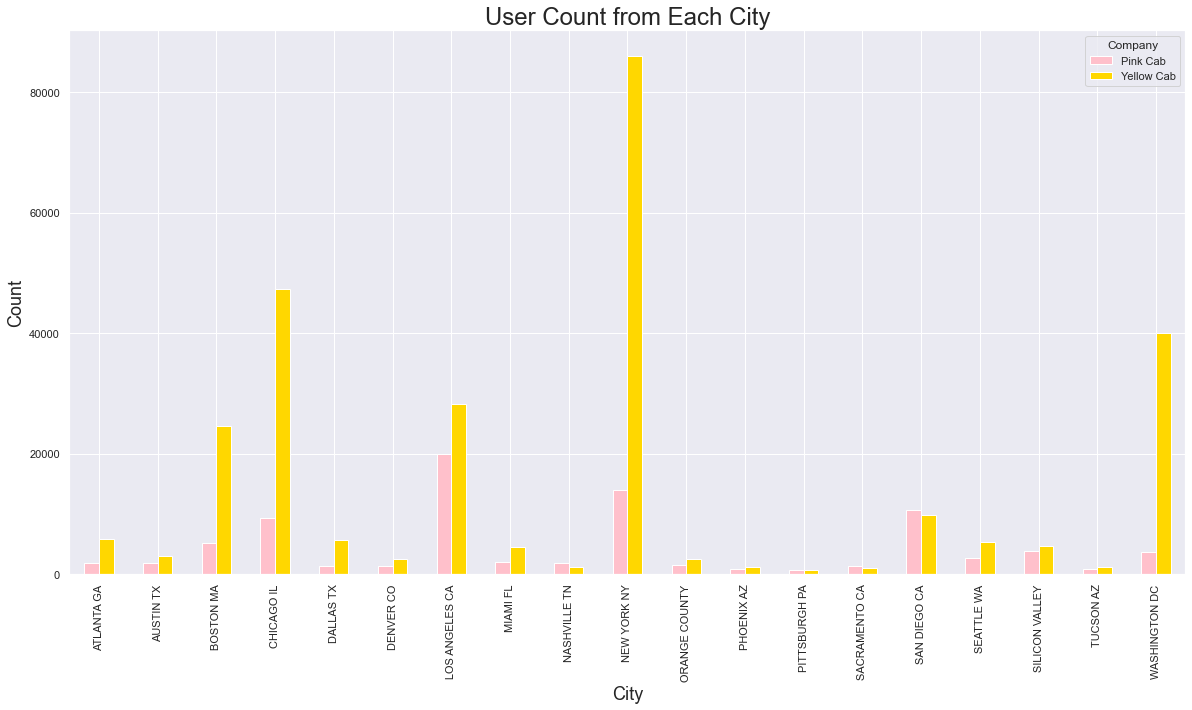

In [103]:
plt.rcParams["figure.figsize"] = (20, 10)
city_C.unstack().plot.bar(legend=True, color=['pink', 'gold'])

plt.title('User Count from Each City',  fontsize = 24)
plt.xlabel('City', fontsize = 18)
plt.ylabel('Count', fontsize = 18)

Yellow Cab has more users than Pink Cab in the top 5 most populated cities of the ones included. They also seem to do better in almost every city on the list.

In [90]:
master.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month)
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,"814,885","24,701",Male,28,10813
1,10351127,21-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,"814,885","24,701",Male,28,10813
2,10412921,23-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,"814,885","24,701",Male,28,10813
3,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,"814,885","24,701",Male,27,9237
4,10320494,21-04-2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,"814,885","24,701",Male,27,9237


In [96]:
unique_customer = master.groupby(['Company'])['Customer ID'].nunique()
unique_customer

Company
Pink Cab      32330
Yellow Cab    39896
Name: Customer ID, dtype: int64

Text(0, 0.5, 'Count')

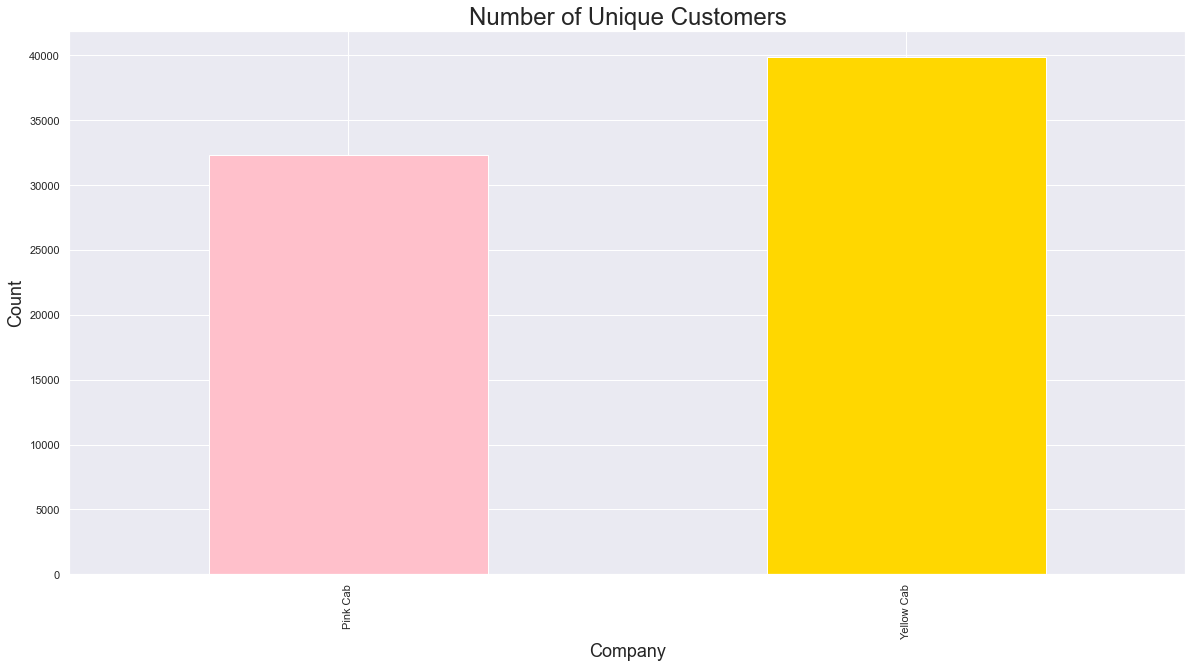

In [114]:
plt.rcParams["figure.figsize"] = (20, 10)
unique_customer.plot.bar(color=['pink', 'gold'])
plt.title('Number of Unique Customers',  fontsize = 24)
plt.xlabel('Company', fontsize = 18)
plt.ylabel('Count', fontsize = 18)

Yellow Cab has more unique customers than Pink Cab, but not by much. With Yellow cab having significantly given more rides than its counterpart, the data suggests that Yellow Cab has more loyal customers. 

## Demographic

In [116]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [127]:
customer_s = customer_id.groupby(['Gender'])['Customer ID'].count()
customer_s

Gender
Female    22609
Male      26562
Name: Customer ID, dtype: int64

Text(0, 0.5, 'Count')

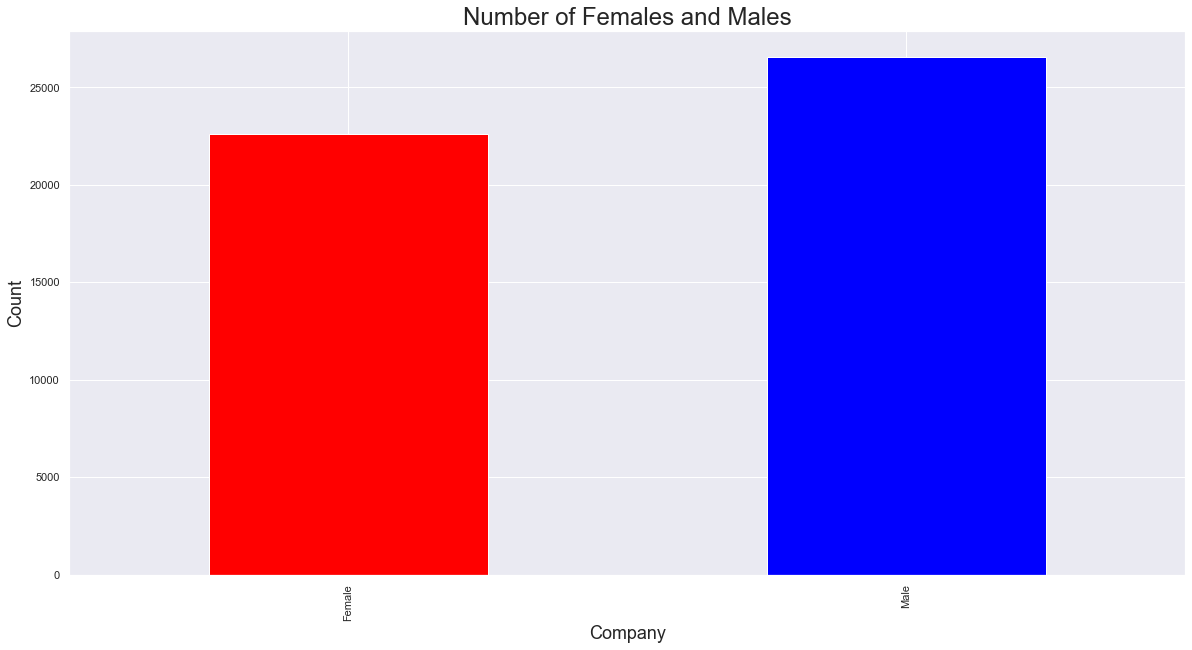

In [191]:
plt.rcParams["figure.figsize"] = (20, 10)
customer_s.plot.bar(color=['Red', 'blue'])
plt.title('Number of Females and Males',  fontsize = 24)
plt.xlabel('Company', fontsize = 18)
plt.ylabel('Count', fontsize = 18)

In [174]:
customer_a = customer_id.groupby(['Age'])['Customer ID'].count()
customer_a.head()

Age
18    1551
19    1561
20    1641
21    1554
22    1596
Name: Customer ID, dtype: int64

Text(0, 0.5, 'Count')

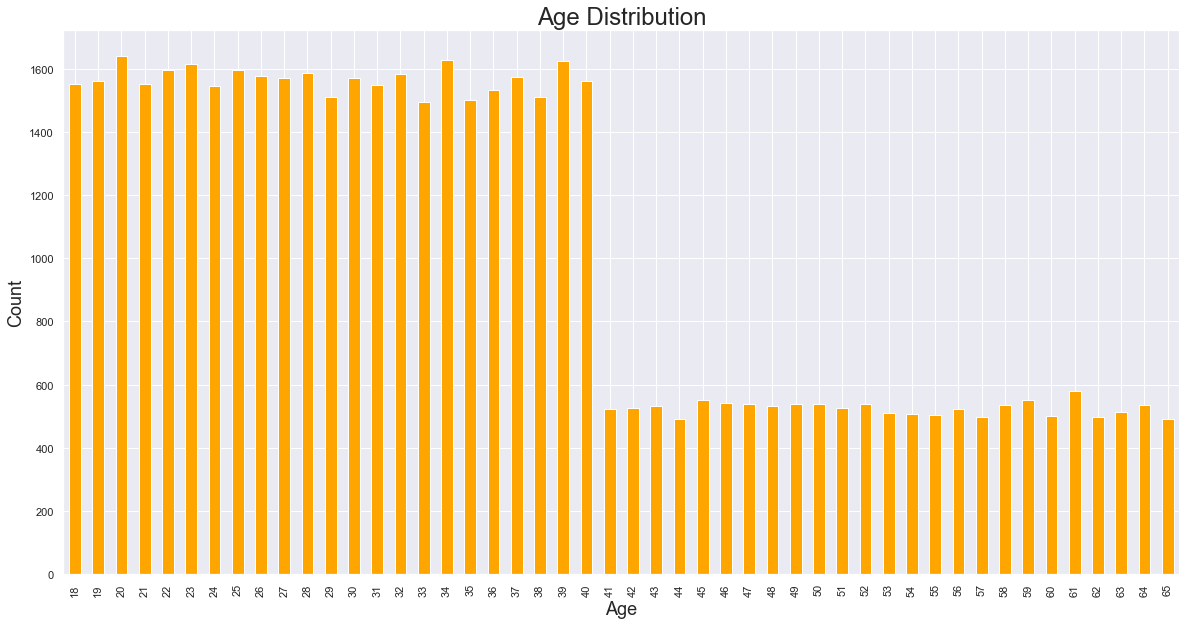

In [190]:
plt.rcParams["figure.figsize"] = (20, 10)
bins= [0,18,25,35,55,70]
customer_a.plot.bar(color=['orange'])
plt.title('Age Distribution',  fontsize = 24)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Count', fontsize = 18)

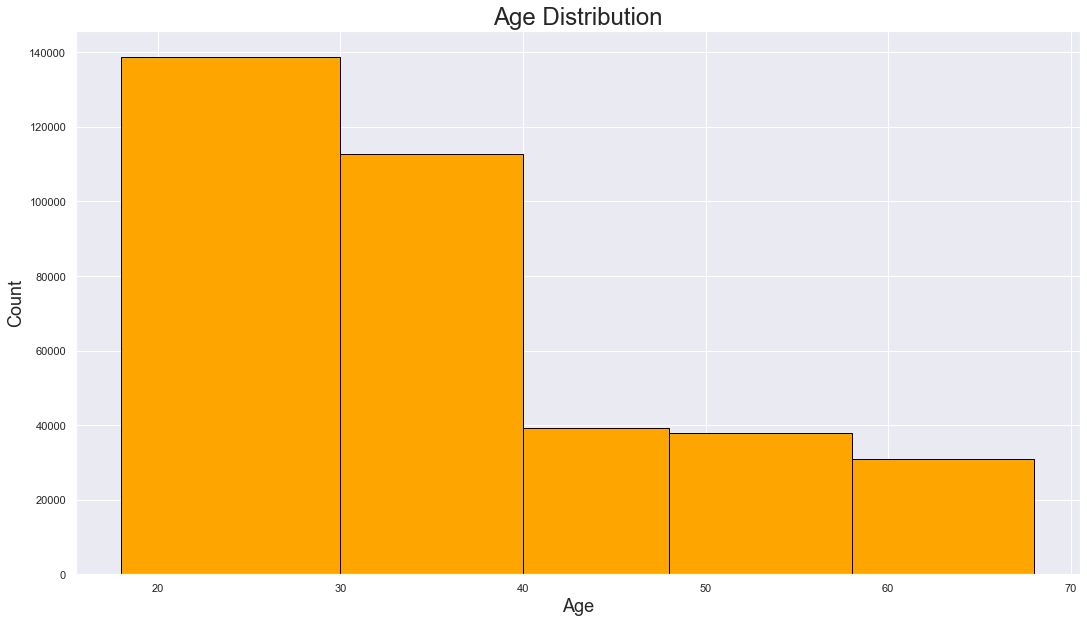

In [208]:
bins= [18,30,40,48,58,68]
plt.hist(master['Age'], edgecolor="black",color="orange", bins=bins)
plt.title('Age Distribution',  fontsize = 24)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.show()

In [189]:
master['Age'].describe()

count    359392.000000
mean         35.336705
std          12.594234
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: Age, dtype: float64

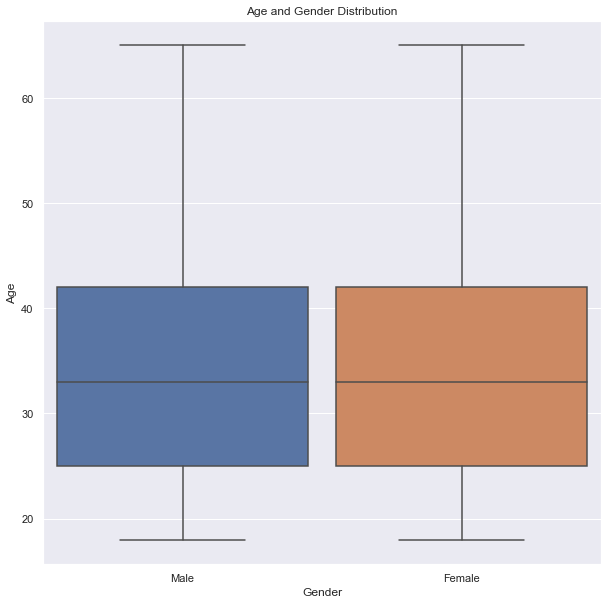

In [210]:
sns.set(rc={'figure.figsize':(10,10)})
ride_profits = sns.boxplot( x=master["Gender"], y=master["Age"], orient = 'v', width=.9).set(title='Age and Gender Distribution')

In [171]:
customer_demo = customer_id.groupby(['Age', 'Gender'])['Customer ID'].count().unstack()
customer_demo.head()

Gender,Female,Male
Age,,
18,736,815
19,692,869
20,798,843
21,682,872
22,755,841


Text(0, 0.5, 'Count')

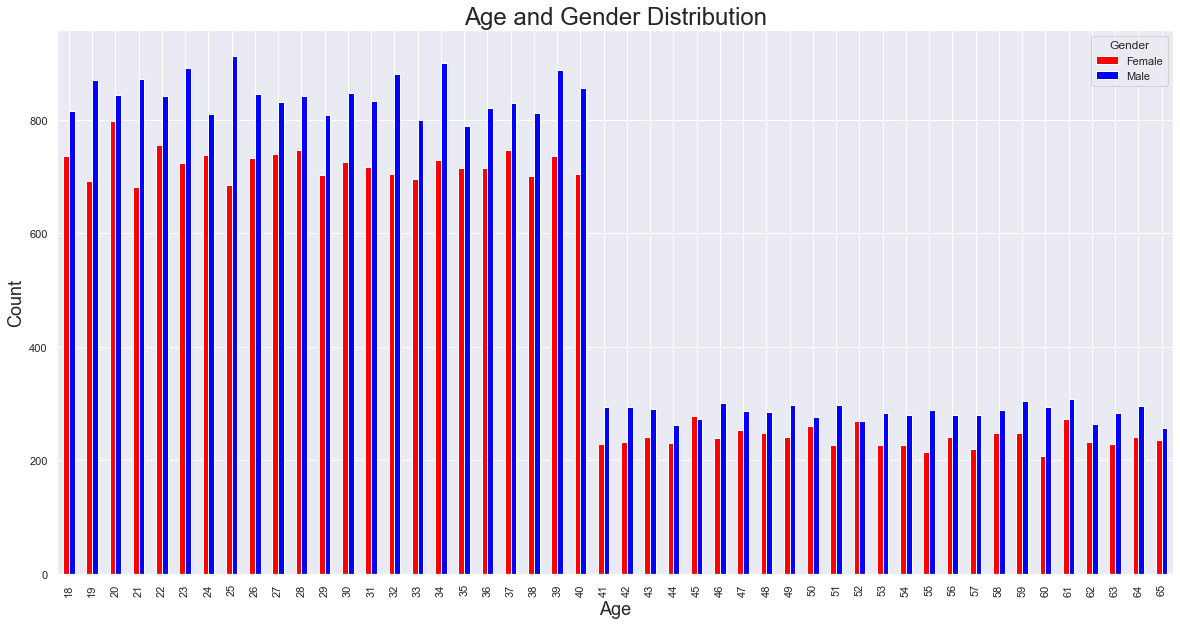

In [209]:
plt.rcParams["figure.figsize"] = (20, 10)
customer_demo.plot.bar(legend=True,color=['Red', 'blue'])
plt.title('Age and Gender Distribution',  fontsize = 24)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Count', fontsize = 18)

In [199]:
master.groupby('Gender').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,153480.0,35.287608,12.620318,18.0,25.0,33.0,42.0,65.0
Male,205912.0,35.373300,12.574664,18.0,25.0,33.0,42.0,65.0


A majority of users fall below the age of 40.

In [212]:
master.groupby('Company').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Pink Cab,84711.0,35.322414,12.644780,18.0,25.0,33.0,42.0,65.0
Yellow Cab,274681.0,35.341112,12.578625,18.0,25.0,33.0,42.0,65.0


[Text(0.5, 1.0, 'Age Distribution')]

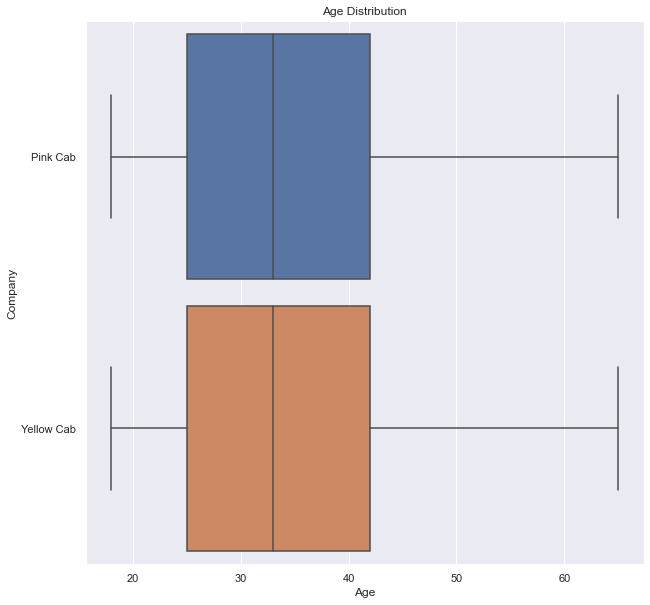

In [234]:
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(y = master["Company"], x = master["Age"], orient = 'h', width=.9).set(title='Age Distribution')

In [235]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


(array([1845., 1875., 1856., 1878., 1821., 1729., 1902., 1836., 1817.,
        1729., 1877., 1776., 1861., 1854., 1775., 1840., 1847., 1773.,
        1834., 1796., 1837., 1769., 1835., 1926., 1019.,  448.,  407.,
         428.,  389.,  432.,  401.,  421.,  450.,  441.,  447.]),
 array([ 2000.        ,  2942.85714286,  3885.71428571,  4828.57142857,
         5771.42857143,  6714.28571429,  7657.14285714,  8600.        ,
         9542.85714286, 10485.71428571, 11428.57142857, 12371.42857143,
        13314.28571429, 14257.14285714, 15200.        , 16142.85714286,
        17085.71428571, 18028.57142857, 18971.42857143, 19914.28571429,
        20857.14285714, 21800.        , 22742.85714286, 23685.71428571,
        24628.57142857, 25571.42857143, 26514.28571429, 27457.14285714,
        28400.        , 29342.85714286, 30285.71428571, 31228.57142857,
        32171.42857143, 33114.28571429, 34057.14285714, 35000.        ]),
 <BarContainer object of 35 artists>)

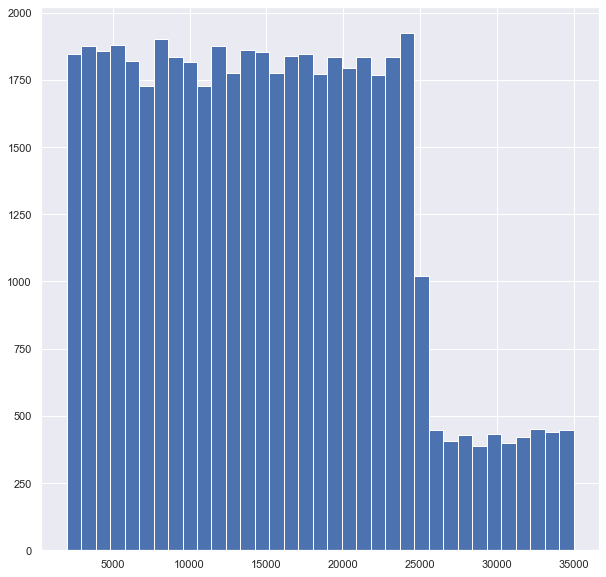

In [239]:
plt.hist(customer_id['Income (USD/Month)'], 35)

In [241]:
customer_id['Income (USD/Month)'].describe()

count    49171.000000
mean     15015.631856
std       8002.208253
min       2000.000000
25%       8289.500000
50%      14656.000000
75%      21035.000000
max      35000.000000
Name: Income (USD/Month), dtype: float64

## Expenses, Earnings, and Profits

[Text(0.5, 1.0, 'Price Charge Comparison')]

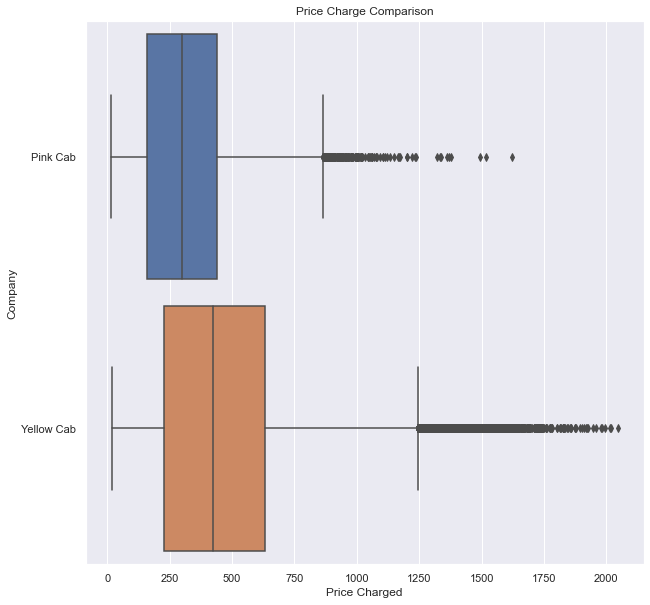

In [204]:
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(y = cab_data["Company"], x = cab_data["Price Charged"], orient = 'h', width=.9).set(title='Price Charge Comparison')

[Text(0.5, 1.0, 'Expenses Comparison')]

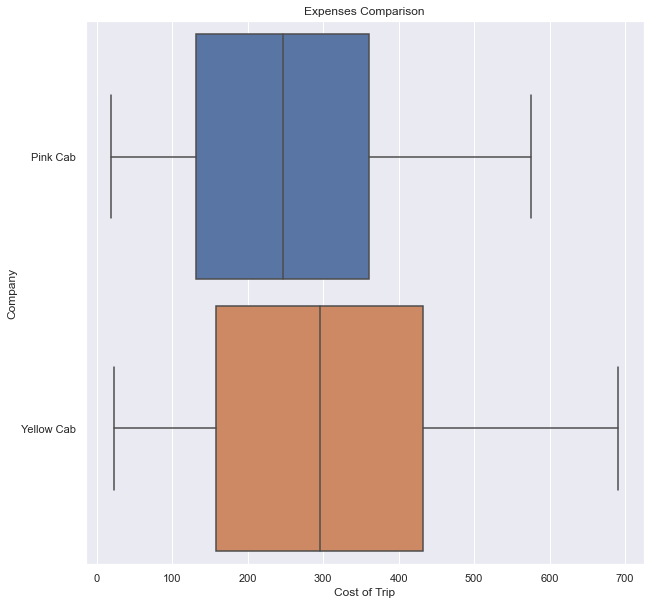

In [202]:
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot( y=cab_data["Company"], x=cab_data["Cost of Trip"], orient = 'h', width=.9).set(title='Expenses Comparison')

In [105]:
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


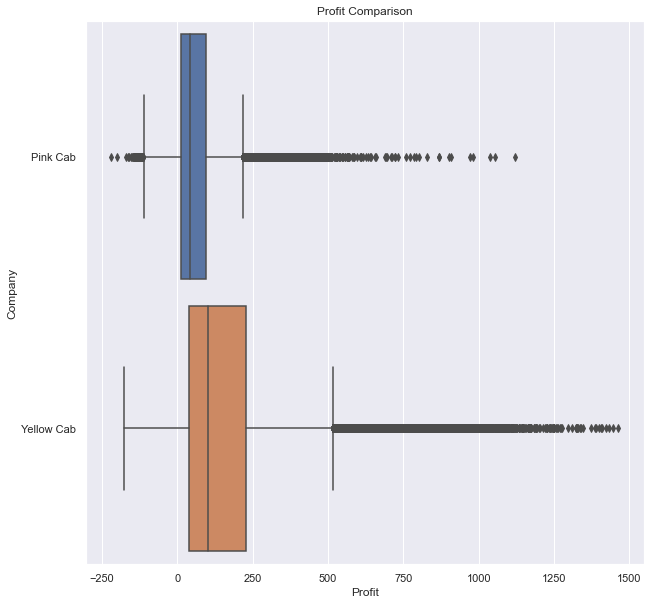

In [203]:
sns.set(rc={'figure.figsize':(10,10)})
ride_profits = sns.boxplot( y=cab_data["Company"], x=cab_data["Profit"], orient = 'h', width=.9).set(title='Profit Comparison')

In [113]:
cab_data.groupby('Company').Profit.describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Pink Cab,84711.0,62.652174,77.590378,-220.0600,11.206,41.5,93.9650,1119.480
Yellow Cab,274681.0,160.259986,171.823833,-176.9308,37.180,102.0,228.6704,1463.966


In [266]:
yellow_cab = pd.DataFrame(cab_data[cab_data['Company'] == "Yellow Cab"])
yellow_cab['Date of Travel'] = pd.to_datetime(yellow_cab['Date of Travel'])
pink_cab = pd.DataFrame(cab_data[cab_data['Company'] == "Pink Cab"])
pink_cab['Date of Travel'] = pd.to_datetime(pink_cab['Date of Travel'])

c:\users\jefferson pelera\appdata\local\programs\python\python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\jefferson pelera\appdata\local\programs\python\python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\jefferson pelera\appdata\local\programs\python\python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\jefferson pelera\appdata\local\

In [267]:
yellow_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
233,10000384,2016-02-01,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,877.0076
234,10000385,2016-09-01,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,895.7768
235,10000386,2016-03-01,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,232.3320
236,10000387,2016-06-01,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,504.1600
237,10000388,2016-07-01,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,944.1908


In [268]:
pink_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


### Monthly Profits

In [273]:
yellow_pm = yellow_cab.filter(['Date of Travel','Profit'], axis=1)
yellow_pm.set_index('Date of Travel', inplace=True)
yellow_pm = yellow_pm.resample('M').sum()
yellow_pm.head()

,Profit
Date of Travel,
2016-01-31,9.168835e+05
2016-02-29,1.080657e+06
2016-03-31,1.035763e+06
2016-04-30,1.001680e+06
2016-05-31,1.244087e+06


In [275]:
pink_pm = pink_cab.filter(['Date of Travel','Profit'], axis=1)
pink_pm.set_index('Date of Travel', inplace=True)
pink_pm = pink_pm.resample('m').sum()
pink_pm.head()

,Profit
Date of Travel,
2016-01-31,82801.429
2016-02-29,114194.591
2016-03-31,137391.681
2016-04-30,100036.797
2016-05-31,91607.288


<function matplotlib.pyplot.show(close=None, block=None)>

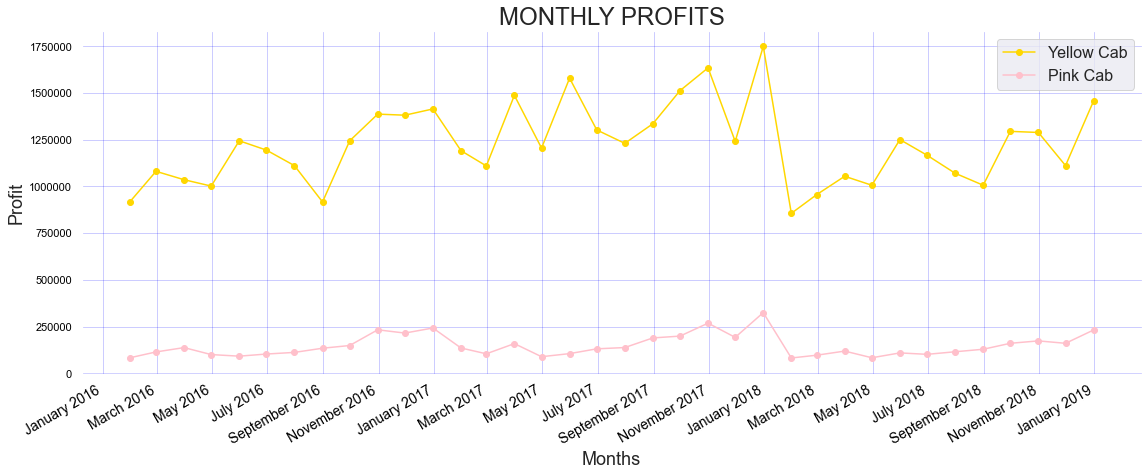

In [247]:
fig, ax = plt.subplots(figsize=(19, 7))
ax.set_facecolor("white")
ax.tick_params(width=1, colors='black', grid_color='blue', grid_alpha=0.2)
ax.ticklabel_format(style='plain')

plt.plot(yellow_pm, label = "Yellow Cab", linestyle="-", color ="Gold", marker = 'o')
plt.plot(pink_pm, label = "Pink Cab", linestyle="-", color ="Pink", marker = 'o')

time_interval = mdates.MonthLocator(interval=2)
date_format = mdates.DateFormatter("%B %Y")
ax.xaxis.set_major_locator(time_interval)
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

plt.xticks(fontsize=14)
plt.title('MONTHLY PROFITS',  fontsize = 24)
plt.xlabel('Months', fontsize = 18)
plt.ylabel('Profit', fontsize = 18)
plt.legend(fontsize = 16)
plt.show

# EDA Recommendation

After reviewing and analyzing the data that has been provided, it is clear that Yellow Cab is a better investment than their competition in Pink Cab.

Points to Consider:
- Yellow Cab company has much a wider customer pool in terms of unique users(different individual users).
- Yellow Cab has provided more rides in almost all of the cities that are shown. 
- The most populated cities in order is New York, Chicago, Los Angeles, Miami, and Silicon Valley.
- They have provided more than 6 times the rides in New York city compared to Pink Cab.
- Yellow Cab has earned much more money per month than Pink Cab from 31/01/2016 to 31/12/2018 in ALL of the months.
- The average profit per ride from Yellow Cab(\\$160.25) is more than double that of Pink Cab(\\$62.65).
- The main demographic for customers are at the ages of 40 or below. Half of the demographic for customers are at the ages of 33 to 42.
- The age distributions for both companies are similar based from the boxplot.